In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_data = pd.read_excel("data.xlsx")
all_data = all_data.drop(columns=['day', 'month', 'year', 'geoId', 'countryterritoryCode', 'popData2019', 'continentExp'])

In [5]:
def getCountry(dt, country):

    dt = dt[dt.countriesAndTerritories.eq(country)]
    dt = dt.reindex(columns = ['dateRep', 'cases', 'deaths', 'cases_total', 'deaths_total', 'countriesAndTerritories'])
    dt['cases_total'].iloc[len(dt.cases) - 1,]  = dt.cases.iloc[len(dt.cases) - 1,]

    for i in reversed(range(len(dt.cases) - 1)):
        dt['cases_total'].iloc[i,]  = dt.cases.iloc[i + 1,] + dt['cases_total'].iloc[i + 1,]
    
    dt['deaths_total'].iloc[len(dt.deaths) - 1,]  = dt.deaths.iloc[len(dt.deaths) - 1,]

    for i in reversed(range(len(dt.deaths) - 1)):
        dt['deaths_total'].iloc[i,]  = dt.deaths.iloc[i + 1,] + dt['deaths_total'].iloc[i + 1,]
        
    dt.name = country
        
    return dt

def plot_Corona(dt):
    
    plt.figure(figsize=(20, 8))
    #plt.plot(germany.dateRep, germany.cases_total, label = "Fälle insgesamt")
    plt.plot(dt.dateRep, dt.cases, label = "neue Fälle")
    #plt.plot(germany.dateRep, germany.deaths_total, label = "Tote insgesamt")
    plt.plot(dt.dateRep, dt.deaths, label = "neue Tote")
    plt.legend()
    plt.title(dt.name)


    

/Users/friedrich/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


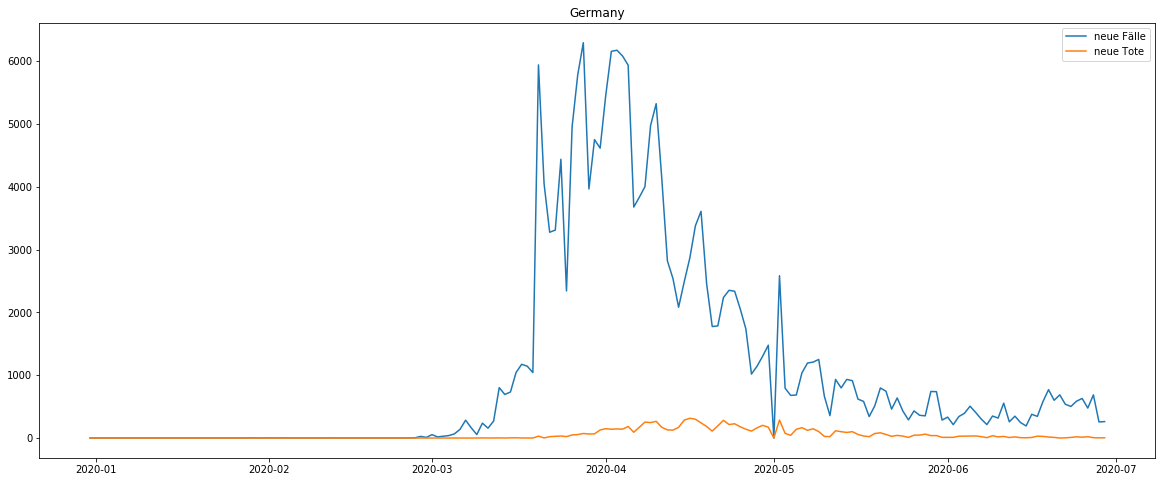

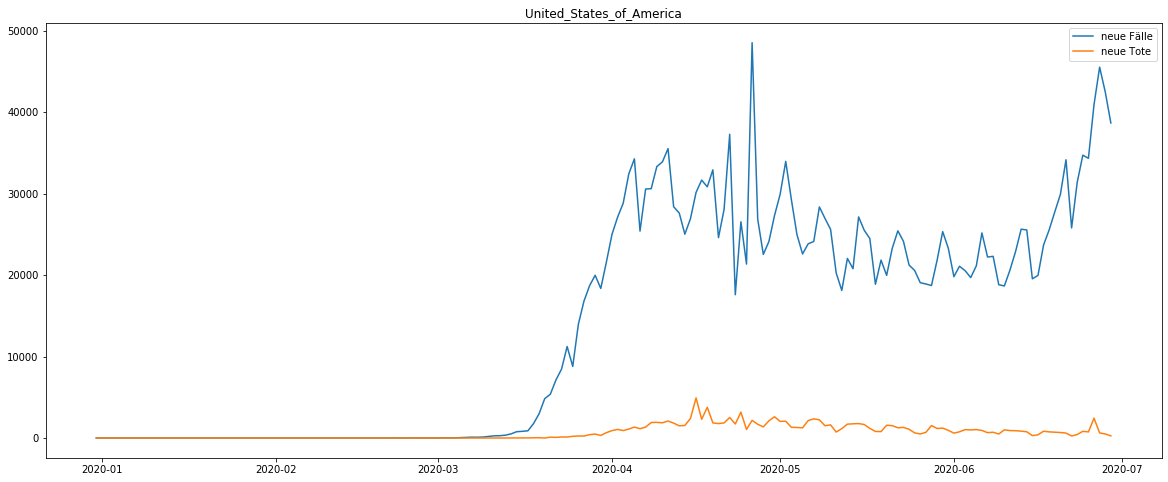

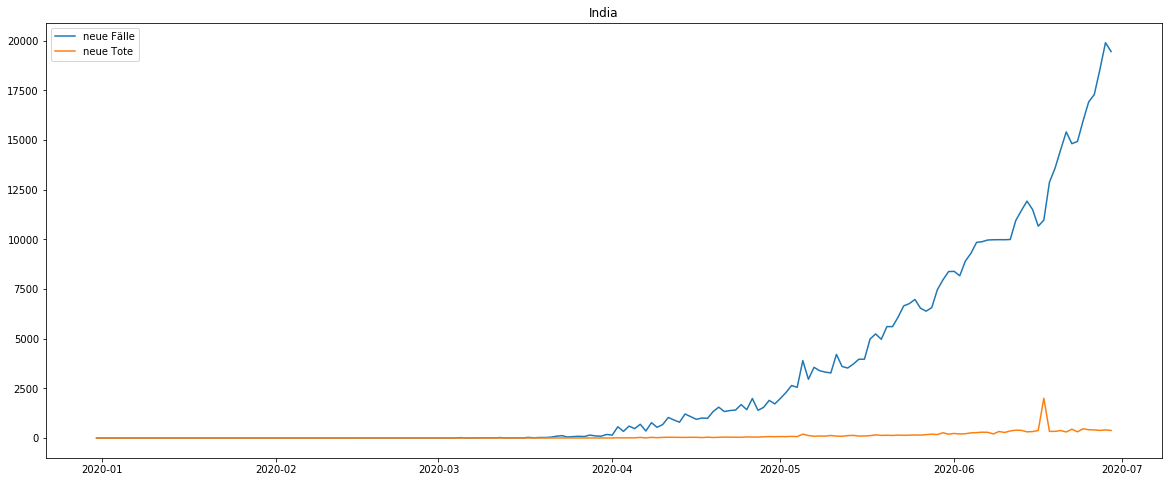

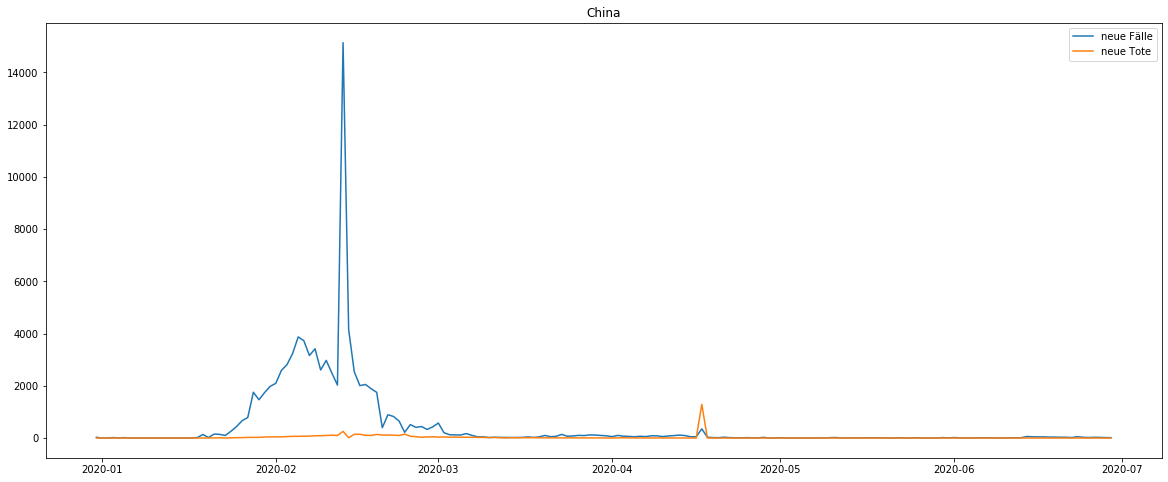

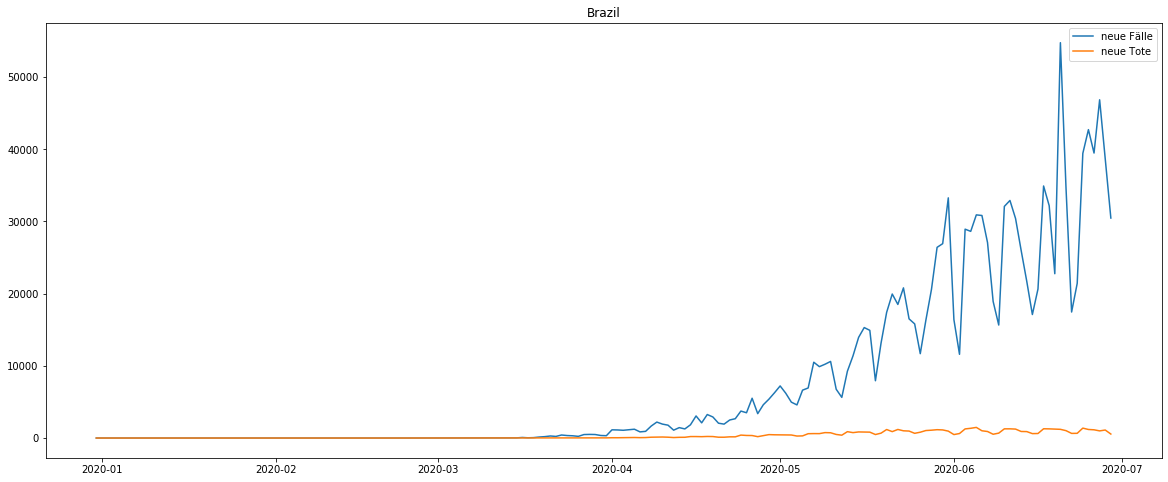

In [6]:
germany = getCountry(all_data, "Germany")
usa = getCountry(all_data, "United_States_of_America")
india = getCountry(all_data, "India")
china = getCountry(all_data, "China")
brazil = getCountry(all_data, "Brazil")

plot_Corona(germany)
plot_Corona(usa)
plot_Corona(india)
plot_Corona(china)
plot_Corona(brazil)